Import neccessary libraries

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Loading the data

In [4]:
sales = pd.read_csv("C:/Users/User/Desktop/Portfolio Project/RossmaN DL/train.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_3972\1728459694.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv("C:/Users/User/Desktop/Portfolio Project/RossmaN DL/train.csv")


In [5]:
store = pd.read_csv("C:/Users/User/Desktop/Portfolio Project/RossmaN DL/store.csv")

In [6]:
#checking the first 5 rows of the data

sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
#checking the shape of the data

print("Shape of the dataset:", sales.shape)

Shape of the dataset: (1017209, 9)


In [10]:
print("Shape of the dataset:", store.shape)

Shape of the dataset: (1115, 10)


In [12]:
#merging the datasets 

df = sales.merge(store,on=["Store"], how="inner")
print(df.shape)

(1017209, 18)


In [13]:
#checking number of unique stores

print("Distinct number of stores:",df.Store.nunique())

Distinct number of stores: 1115


In [14]:
print("Distinct number of Days :", len(df["Date"].
unique()))


Distinct number of Days : 942


In [15]:
print("Average daily sales of all stores : ",round(df
["Sales"].mean()))

Average daily sales of all stores :  5774


In [17]:
#check data types
df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

Working with Time

In [18]:
df["DayOfWeek"].value_counts()

DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: count, dtype: int64

In [19]:
df['Date'].dtype

dtype('O')

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df['Date'].dtype

dtype('<M8[ns]')

In [23]:
#We can extract all date properties from a datetime datatype
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
#df['Week'] = df['Date'].dt.week

In [24]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,7,3,2015,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,3,2015,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,3,2015,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,7,3,2015,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,7,3,2015,31


In [26]:
# Group monthws in to season
df['Season'] = np.where(df['Month'].isin([3, 4, 5]), "Spring", 
                   np.where(df['Month'].isin([6, 7, 8]), "Summer", 
                   np.where(df['Month'].isin([9, 10, 11]), "Fall", 
                   np.where(df['Month'].isin([12, 1, 2]), "Winter",  "None" ))))

In [27]:
df['Season'].unique()

array(['Summer', 'Spring', 'Winter', 'Fall'], dtype=object)

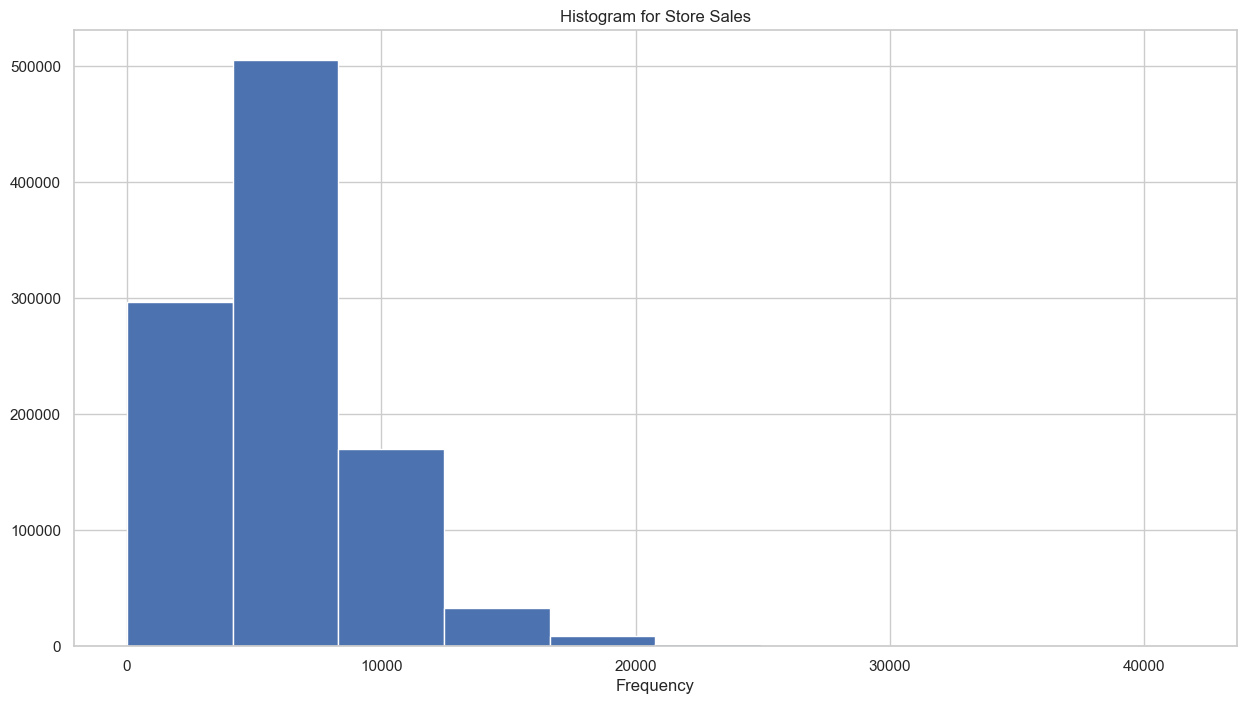

In [59]:
# checking sales column

#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15,8))
plt.hist(df_new["Sales"])
plt.title("Histogram for Store Sales")
plt.xlabel("Frequency")
plt.show()

This indicates that most of the stores have sales in the range 0–20,000

Exploring Numeric Columns

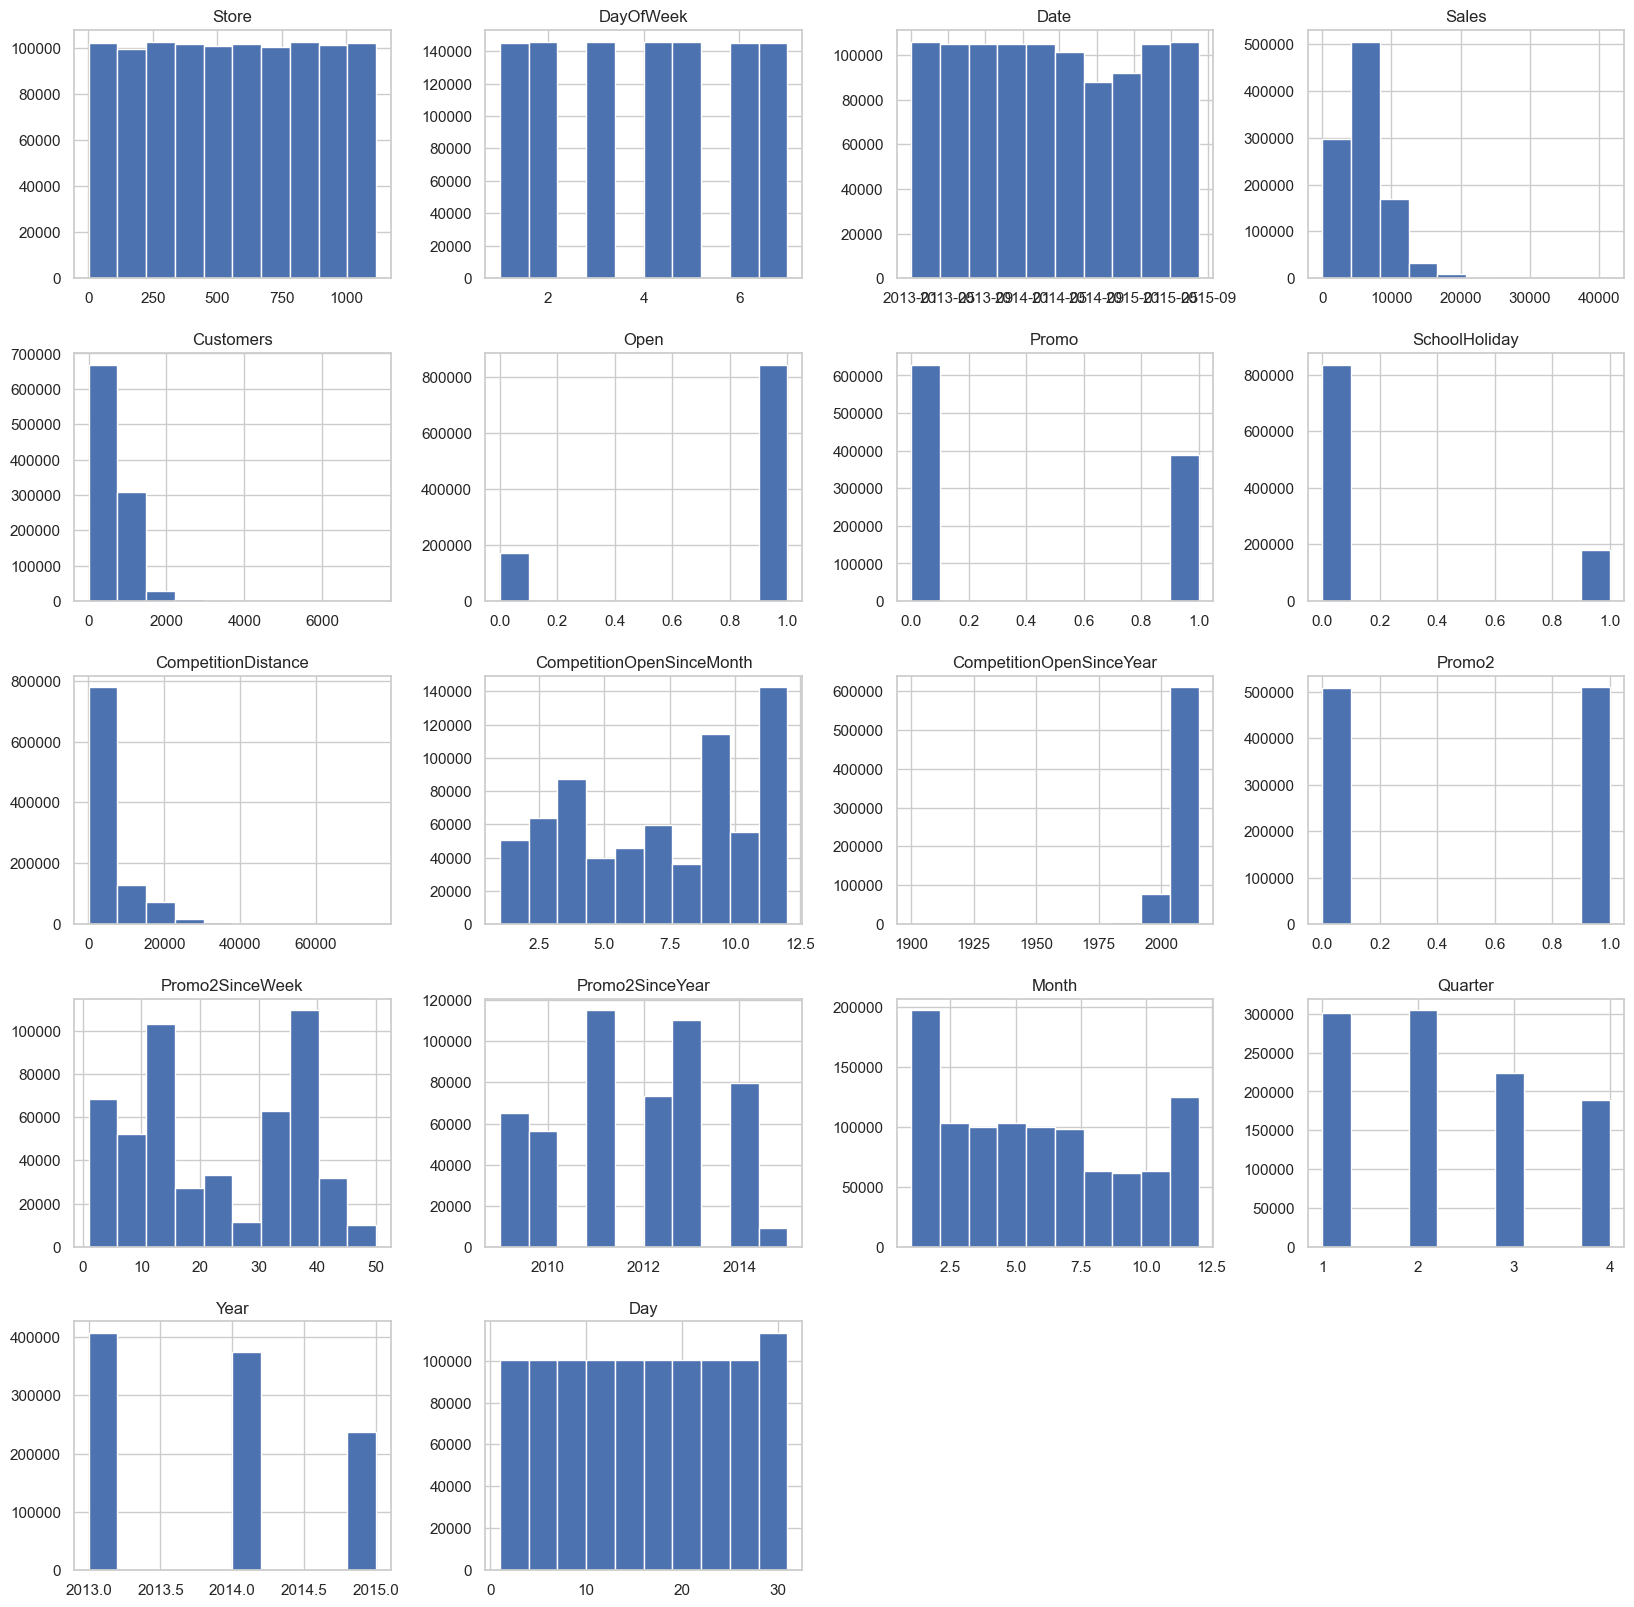

In [28]:
df.hist(figsize=(20,20));

In [30]:
df.isnull().sum()/df.shape[0] * 100 

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Season                        0.000000
dtype: float64

In [31]:
df["CompetitionDistance"] = df["CompetitionDistance"].fillna(df['CompetitionDistance'].mode()[0])

In [32]:
df["CompetitionDistance"].isnull().sum()/df.shape[0] * 100

0.0

Exploring Cateorical features

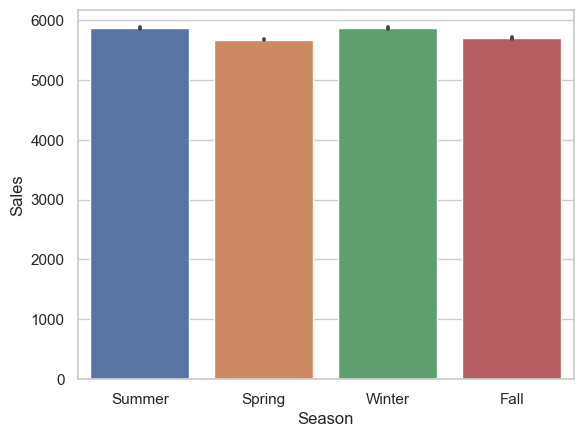

In [33]:
#Create the bar plot for Average Sales across different Seasons
ax = sns.barplot(x="Season", y="Sales", data=df)

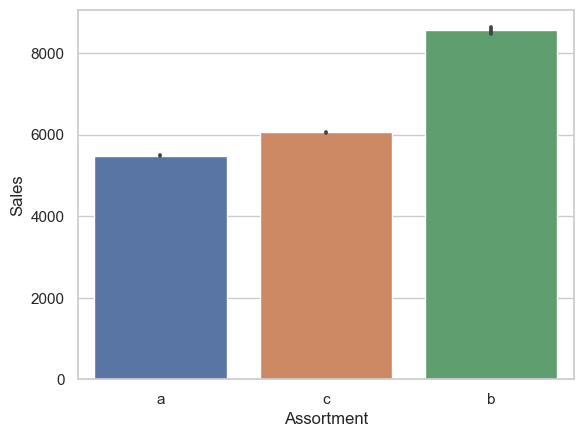

In [65]:
#Create the bar plot for Average Sales across different Assortments
ax = sns.barplot(x="Assortment", y="Sales", data=df_new)

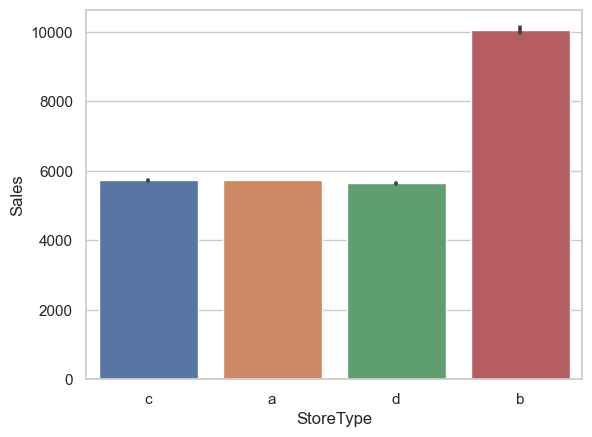

In [34]:
#Create a bar plot for average sales accross diffrent stores
ax = sns.barplot(x='StoreType', y='Sales', data=df)

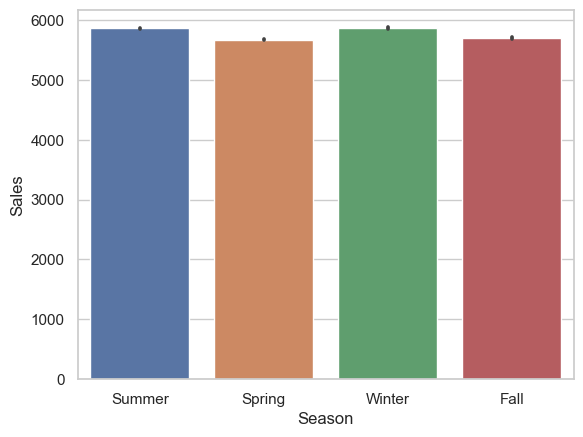

In [35]:
#Create a bar plot for average sales accross each season
ax = sns.barplot(x='Season', y='Sales', data=df)

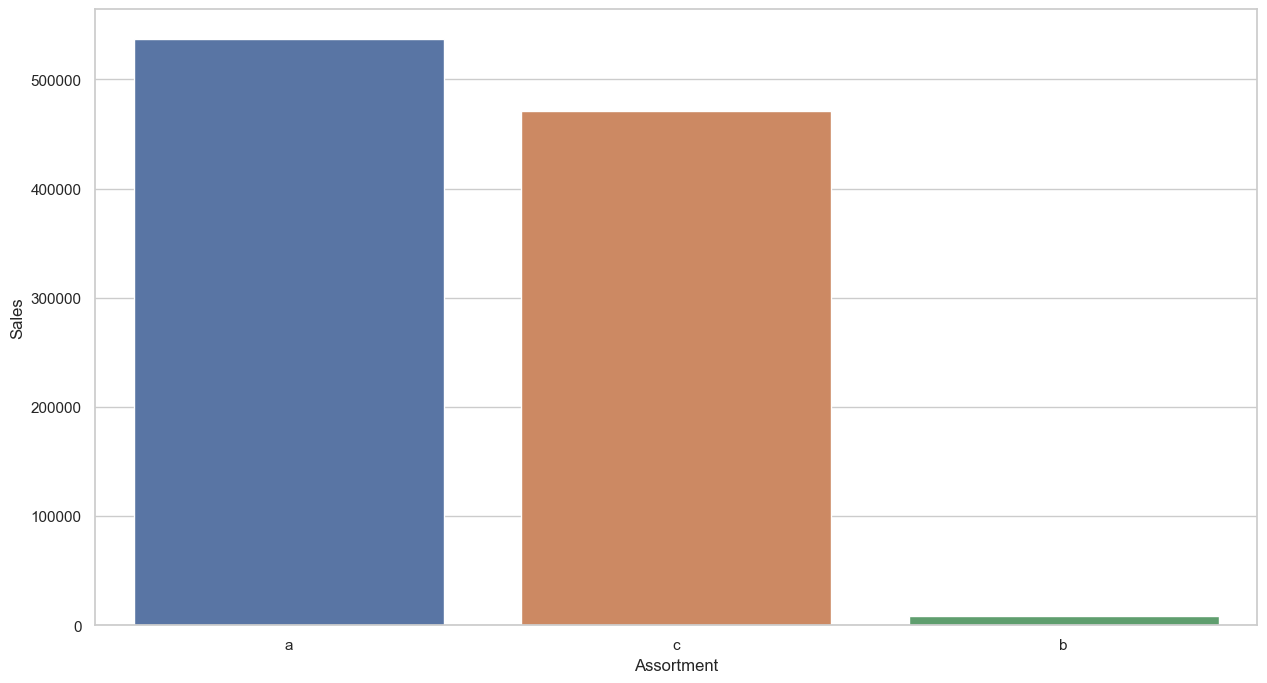

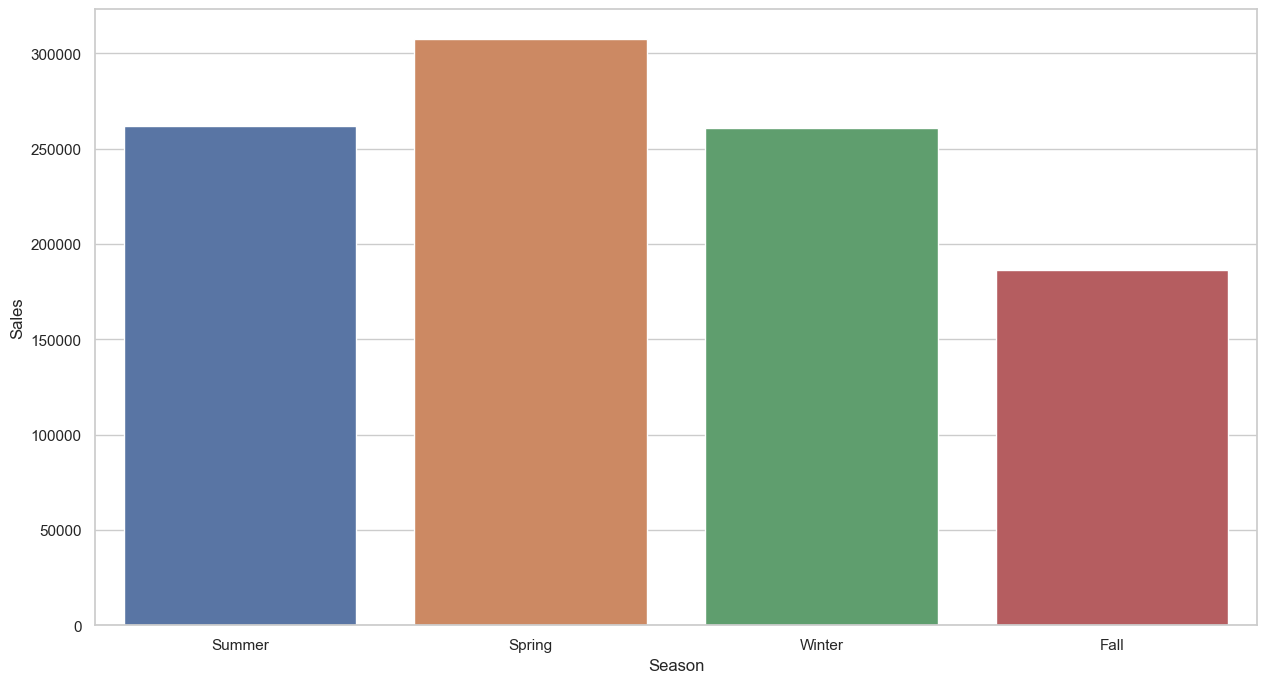

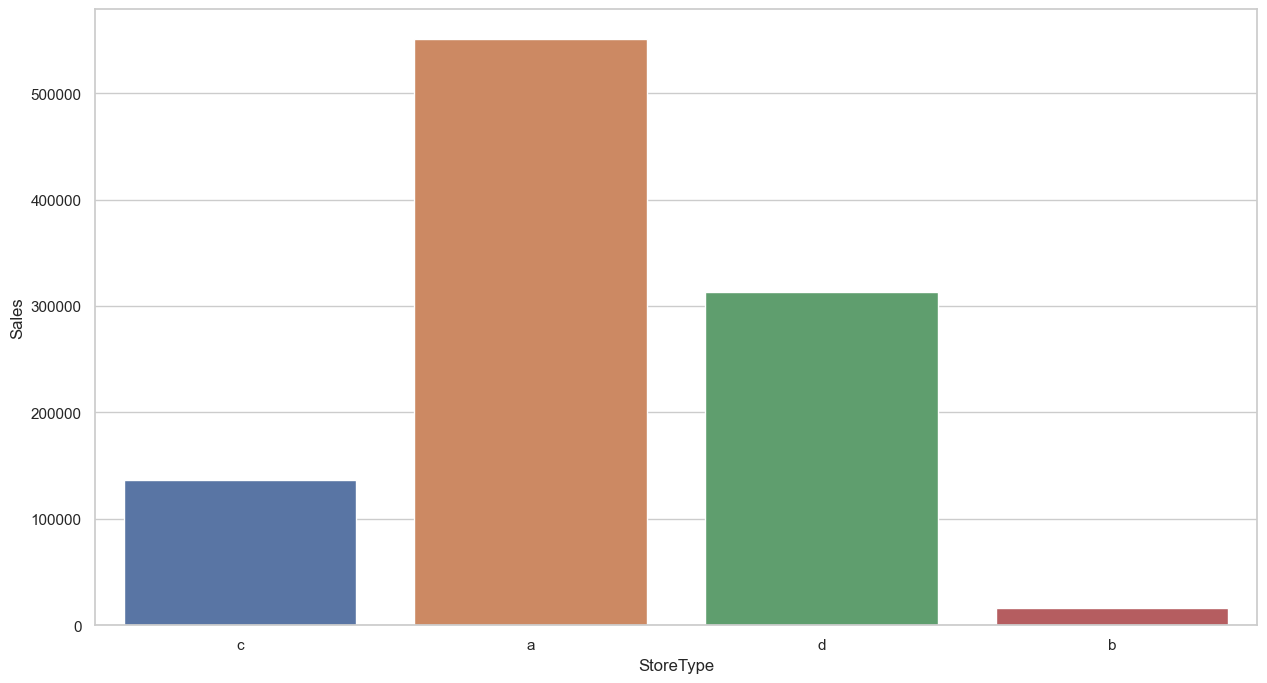

In [68]:
for i in ["Assortment", 'Season', 'StoreType']:
    plt.figure(figsize=(15,8))
    ax = sns.barplot(x=i, y='Sales', data=df, estimator=np.size)
    plt.show

Feature Preprocessing

In [36]:
Target = ['Sales']

In [37]:
df.dtypes == 'number'

Store                        False
DayOfWeek                    False
Date                         False
Sales                        False
Customers                    False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
Month                        False
Quarter                      False
Year                         False
Day                          False
Season                       False
dtype: bool

In [38]:
numeric_columns = ["Customers","Open","Promo","Promo2", 
"StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year", 
"StoreType","Assortment","Season", 'StateHoliday']

In [39]:
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [41]:
#We create a loop to create the final dataset with all features
data = df[numeric_columns]
for column in categorical_columns:
    data_df = create_ohe(df,column)
    data = pd.concat([data,data_df],axis=1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [42]:
print("Shape of Data:",data.shape)
print("Distinct Datatypes:",data.dtypes.unique())

Shape of Data: (1017209, 44)
Distinct Datatypes: [dtype('int64') dtype('O') dtype('float64')]


In [43]:
print(data.columns[data.dtypes=="object"])

Index(['StateHoliday'], dtype='object')


In [44]:
data["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [46]:
data["StateHoliday"] = np.where(data["StateHoliday"] == '0', 0, 1)

In [47]:
data.dtypes.unique()

array([dtype('int64'), dtype('int32'), dtype('float64')], dtype=object)

In [48]:
#Create train and test dataset with an 80:20 split

x_train, x_test, y_train, y_test = train_test_split(data, 
df[Target],test_size=0.2,random_state=2018)

#Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train, 
y_train, test_size=0.1, random_state=2018)


In [57]:
#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (732390, 44)
Shape of x_val: (81377, 44)
Shape of x_test: (203442, 44)
Shape of y_train: (732390, 1)
Shape of y_val: (81377, 1)
Shape of y_test: (203442, 1)


Defining model baseline performance

In [58]:
#calculate the average score of the train dataset
mean_sales = y_train.mean()
print("Average Sales :", round(mean_sales))

Average Sales : Sales    5776.0
dtype: float64


In [59]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE  for theTest Data:", abs(y_test - mean_sales).mean()[0])

MAE  for theTest Data: 2886.389174794596


C:\Users\User\AppData\Local\Temp\ipykernel_3972\3137236812.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("MAE  for theTest Data:", abs(y_test - mean_sales).mean()[0])


Baseline performance is 2886.38

If the model performance is greater than the baseline performance, it doesnt add any value

Create a deep learning model

In [60]:
model = Sequential()
model.add(Dense(150, input_dim=44, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# Train the model
model.fit(x_train.values, y_train.values, validation_data=(x_val, y_val), epochs=10, batch_size=64)




Epoch 1/10


11444/11444 [==============================] - 27s 2ms/step - loss: 955.7206 - mean_absolute_error: 955.7206 - val_loss: 821.5504 - val_mean_absolute_error: 821.5504
Epoch 2/10
11444/11444 [==============================] - 22s 2ms/step - loss: 780.1313 - mean_absolute_error: 780.1313 - val_loss: 743.9622 - val_mean_absolute_error: 743.9622
Epoch 3/10
11444/11444 [==============================] - 28s 2ms/step - loss: 737.4858 - mean_absolute_error: 737.4858 - val_loss: 715.2600 - val_mean_absolute_error: 715.2600
Epoch 4/10
11444/11444 [==============================] - 38s 3ms/step - loss: 720.2709 - mean_absolute_error: 720.2709 - val_loss: 703.6810 - val_mean_absolute_error: 703.6810
Epoch 5/10
11444/11444 [==============================] - 33s 3ms/step - loss: 710.1152 - mean_absolute_error: 710.1152 - val_loss: 701.1022 - val_mean_absolute_error: 701.1022
Epoch 6/10
11444/11444 [==============================] - 32s 3ms/step - loss: 701.7407 - mean_absolute_error: 

In [89]:
eval = model.evaluate(x_test.values, y_test.values)

6358/6358 [==============================] - 11s 2ms/step - loss: 670.8021 - mean_absolute_error: 670.8021


In [ ]:
error_list = ['mean_absolute_error', 'mean_squared_error']
neurons = [150, 300, 500]


for error in error_list:
    for neuron in neurons:
        model = Sequential()
        model.add(Dense(neuron, input_dim=44, activation='relu'))
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer='adam', loss=error, metrics=['mean_absolute_error'])

        # Train the model
        model.fit(x_train.values, y_train.values, validation_data=(x_val, y_val), epochs=10, batch_size=64)


Epoch 1/10
11444/11444 [==============================] - 22s 2ms/step - loss: 951.7315 - mean_absolute_error: 951.7315 - val_loss: 828.8026 - val_mean_absolute_error: 828.8026
Epoch 2/10
11444/11444 [==============================] - 24s 2ms/step - loss: 790.7908 - mean_absolute_error: 790.7908 - val_loss: 757.8029 - val_mean_absolute_error: 757.8029
Epoch 3/10
11444/11444 [==============================] - 31s 3ms/step - loss: 744.9376 - mean_absolute_error: 744.9376 - val_loss: 723.9072 - val_mean_absolute_error: 723.9072
Epoch 4/10
 2675/11444 [======>.......................] - ETA: 31s - loss: 731.0145 - mean_absolute_error: 731.0145

In [ ]:
eval = model.evaluate(x_test.values, y_test.values)

In [93]:
error_list = ['mean_squared_error']

for error in error_list:
    model = Sequential()
    model.add(Dense(350, input_dim=44, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss=error, metrics=['mean_absolute_error'])

    # Train the model
    model.fit(x_train.values, y_train.values, validation_data=(x_val, y_val), epochs=10, batch_size=64)


Epoch 1/10
11444/11444 [==============================] - 26s 2ms/step - loss: 913.2674 - mean_absolute_error: 913.2674 - val_loss: 788.9912 - val_mean_absolute_error: 788.9912
Epoch 2/10
11444/11444 [==============================] - 26s 2ms/step - loss: 756.4288 - mean_absolute_error: 756.4288 - val_loss: 720.9737 - val_mean_absolute_error: 720.9737
Epoch 3/10
11444/11444 [==============================] - 25s 2ms/step - loss: 726.2167 - mean_absolute_error: 726.2167 - val_loss: 711.3210 - val_mean_absolute_error: 711.3210
Epoch 4/10
11444/11444 [==============================] - 26s 2ms/step - loss: 711.8807 - mean_absolute_error: 711.8807 - val_loss: 698.8537 - val_mean_absolute_error: 698.8537
Epoch 5/10
11444/11444 [==============================] - 29s 3ms/step - loss: 702.8755 - mean_absolute_error: 702.8755 - val_loss: 699.3387 - val_mean_absolute_error: 699.3387
Epoch 6/10
11444/11444 [==============================] - 25s 2ms/step - loss: 696.2831 - mean_absolute_error: 696.

In [99]:
model = Sequential()
model.add(Dense(500, input_dim=44, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# Train the model
model.fit(x_train.values, y_train.values, validation_data=(x_val, y_val), epochs=10, batch_size=64)


Epoch 1/10
11444/11444 [==============================] - 26s 2ms/step - loss: 892.0408 - mean_absolute_error: 892.0408 - val_loss: 808.2009 - val_mean_absolute_error: 808.2009
Epoch 2/10
11444/11444 [==============================] - 28s 2ms/step - loss: 746.7242 - mean_absolute_error: 746.7242 - val_loss: 735.9940 - val_mean_absolute_error: 735.9940
Epoch 3/10
11444/11444 [==============================] - 28s 2ms/step - loss: 722.0140 - mean_absolute_error: 722.0140 - val_loss: 714.2108 - val_mean_absolute_error: 714.2108
Epoch 4/10
11444/11444 [==============================] - 28s 2ms/step - loss: 709.7122 - mean_absolute_error: 709.7122 - val_loss: 713.3924 - val_mean_absolute_error: 713.3924
Epoch 5/10
11444/11444 [==============================] - 28s 2ms/step - loss: 702.9585 - mean_absolute_error: 702.9585 - val_loss: 694.7186 - val_mean_absolute_error: 694.7186
Epoch 6/10
11444/11444 [==============================] - 27s 2ms/step - loss: 697.3533 - mean_absolute_error: 697.

In [101]:
model = Sequential()
model.add(Dense(500, input_dim=44, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# Train the model
model.fit(x_train.values, y_train.values, validation_data=(x_val, y_val), epochs=15, batch_size=64)


Epoch 1/15
11444/11444 [==============================] - 27s 2ms/step - loss: 895.9916 - mean_absolute_error: 895.9916 - val_loss: 759.9264 - val_mean_absolute_error: 759.9264
Epoch 2/15
11444/11444 [==============================] - 26s 2ms/step - loss: 746.1912 - mean_absolute_error: 746.1912 - val_loss: 724.8168 - val_mean_absolute_error: 724.8168
Epoch 3/15
11444/11444 [==============================] - 28s 2ms/step - loss: 721.4988 - mean_absolute_error: 721.4988 - val_loss: 732.0612 - val_mean_absolute_error: 732.0612
Epoch 4/15
11444/11444 [==============================] - 28s 2ms/step - loss: 708.5978 - mean_absolute_error: 708.5978 - val_loss: 702.7628 - val_mean_absolute_error: 702.7628
Epoch 5/15
11444/11444 [==============================] - 27s 2ms/step - loss: 702.4562 - mean_absolute_error: 702.4562 - val_loss: 697.5925 - val_mean_absolute_error: 697.5925
Epoch 6/15
11444/11444 [==============================] - 29s 2ms/step - loss: 697.8260 - mean_absolute_error: 697.

In [105]:
#Manually predicting from the model, instead of using model's evaluate function

y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(10))

#Manually predicting from the model, instead of using model's evaluate function
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :",mean_squared_error(y_test["Actual Sales"].
values,y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].
values,y_test["Predicted Sales"].values))

6358/6358 [==============================] - 10s 1ms/step
        Actual Sales  Predicted Sales
115563             0        33.274174
832654             0        15.474622
769112          2933      3152.381348
350588          8602      7591.506836
141556          6975      6358.879395
84435           9239      8685.403320
53018              0        24.997009
262419             0        20.589226
702267          5885      5808.320801
981431             0         5.983484
MSE : 984900.2516076928
MAE : 660.7872616865421


In [110]:
from keras.callbacks import History
history = History()


model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val), 
epochs=15,batch_size=64)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/15
11444/11444 [==============================] - 42s 4ms/step - loss: 1689490.0000 - mean_absolute_error: 849.1478 - val_loss: 1357059.7500 - val_mean_absolute_error: 774.9743
Epoch 2/15
11444/11444 [==============================] - 41s 4ms/step - loss: 1159206.8750 - mean_absolute_error: 721.1952 - val_loss: 1071552.7500 - val_mean_absolute_error: 693.7787
Epoch 3/15
11444/11444 [==============================] - 41s 4ms/step - loss: 1090397.5000 - mean_absolute_error: 698.2388 - val_loss: 1116517.8750 - val_mean_absolute_error: 722.9581
Epoch 4/15
11444/11444 [==============================] - 40s 3ms/step - loss: 1058408.8750 - mean_absolute_error: 688.2603 - val_loss: 988336.6250 - val_mean_absolute_error: 676.8029
Epoch 5/15
11444/11444 [==============================] - 41s 4ms/step - loss: 1030906.0625 - mean_absolute_error: 680.2717 - val_loss: 1175893.6250 - val_mean_absolute_error: 751.1360
Epoch 6/15
11444/11444 [==============================] - 41s 4ms/step - los

In [111]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

KeyError: 'loss'

In [108]:
#Manually predicting from the model, instead of using model's evaluate function

y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(10))

#Manually predicting from the model, instead of using model's evaluate function
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :",mean_squared_error(y_test["Actual Sales"].
values,y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].
values,y_test["Predicted Sales"].values))

6358/6358 [==============================] - 11s 2ms/step


ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements